In [20]:
from ludwig.visualize import learning_curves, compare_performance
from ludwig.utils.data_utils import load_json
import pandas as pd
import os
import os.path

In [15]:
train_stats = load_json('./results/multiple_experiment_Option3/training_statistics.json')

In [16]:
train_stats

{'test': {'combined': {'accuracy': [0.2091464946812966,
    0.43328586983834494,
    0.38177401792444926,
    0.38177401792444926,
    0.47323896473741517,
    0.4860541083842868,
    0.4461010134852165,
    0.5306977133763296],
   'loss': [2.160790587601844,
    1.687038263470616,
    1.6269417793190213,
    1.6939270903950552,
    1.433612294048907,
    1.3750251078587679,
    1.4659449453279594,
    1.2833427683533671]},
  'label': {'accuracy': [0.2091464946812966,
    0.43328586983834494,
    0.38177401792444926,
    0.38177401792444926,
    0.47323896473741517,
    0.4860541083842868,
    0.4461010134852165,
    0.5306977133763296],
   'hits_at_k': [0.35949409498282936,
    0.6325487896808778,
    0.7122874612614122,
    0.6192310913811877,
    0.7566797889270458,
    0.78641427255214,
    0.7318870927213335,
    0.7991456570902086],
   'loss': [2.160790587601844,
    1.687038263470616,
    1.6269417793190213,
    1.6939270903950552,
    1.433612294048907,
    1.3750251078587679,


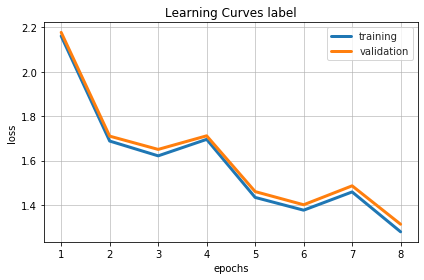

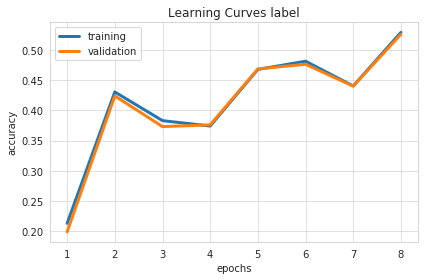

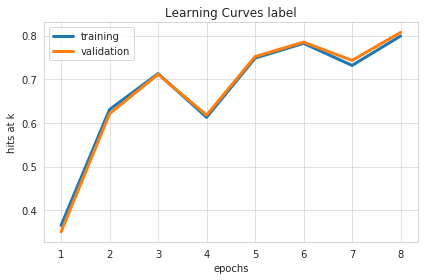

In [13]:
learning_curves(
  [train_stats],
  'label',
  model_names=None,
  output_directory='./viz2',
  file_format='png'
)

In [21]:
# create data set for predictions
test_data = {'image_path': [], 'label': []}
current_dir = os.getcwd()
test_dir = os.path.join(current_dir, 'data', 'mnist_png', 'testing')
for label in os.listdir(test_dir):
    files = os.listdir(os.path.join(test_dir, label))
    test_data['image_path'] += [os.path.join(test_dir, label, f) for f in files]
    test_data['label'] += len(files) * [label]

# collect data into a data frame
test_df = pd.DataFrame(test_data)
print(test_df.head())

                                          image_path label
0  /opt/project/examples/mnist/data/mnist_png/tes...     9
1  /opt/project/examples/mnist/data/mnist_png/tes...     9
2  /opt/project/examples/mnist/data/mnist_png/tes...     9
3  /opt/project/examples/mnist/data/mnist_png/tes...     9
4  /opt/project/examples/mnist/data/mnist_png/tes...     9


In [23]:
# retrieve a trained model
model = LudwigModel.load('./results/multiple_experiment_Option3/model')

# make predictions
pred_df, test_stats = model.test(data_df=test_df)
print(pred_df.head())

INFO:tensorflow:Restoring parameters from ./results/multiple_experiment_Option3/model/model_weights
  label_predictions  label_probabilities_<UNK>  label_probabilities_1  \
0                 3               1.069876e-02           3.784087e-02   
1                 3               3.521899e-03           6.790569e-04   
2                 3               4.781057e-03           1.882495e-03   
3                 9               2.456630e-08           1.129862e-19   
4                 3               1.069876e-02           3.784087e-02   

   label_probabilities_7  label_probabilities_3  label_probabilities_2  \
0               0.063360               0.143381               0.140337   
1               0.095824               0.175845               0.172506   
2               0.089475               0.172862               0.169484   
3               0.246823               0.077772               0.077779   
4               0.063360               0.143381               0.140337   

   label_probabi

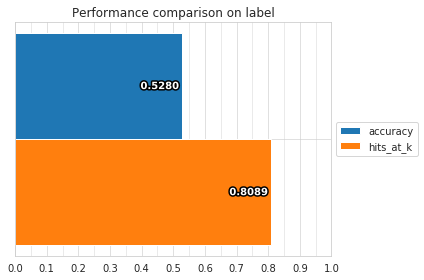

In [24]:
compare_performance(
  [test_stats],
  'label',
  model_names=None,
  output_directory='./viz2',
  file_format='png'
)